In [1]:
#expand cell width to 100%
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#import pandas 
import pandas as pd
#import numpy
import numpy as np

In [3]:
#set the address of the dataframe containing the pre-processed dataset
#dataFramePickleAddress="C:/ML4Sci/Ml4Sci_GRS_abundance_estimation/Dataset/GRSFiveDegreeSectionPreProcessedDataset.pkl"
dataFramePickleAddress="D:/Non-academic/GSOC23/Ml4Sci_GRS_abundance_estimation/Dataset/GRSFiveDegreeSectionPreProcessedDataset.pkl"

In [4]:
#read the dataframe
dataframe=pd.read_pickle(dataFramePickleAddress)

In [5]:
#print the dataframe
dataframe

,Max Lat per section,Min Lat per section,Max Lon per section,Min Lon per section,No. of spectra per section,Total active time per section,Summed Spectra,Normalized Spectra,Log Normalized Spectra,Aluminum,...,Magnesium,Oxygen,Potassium,Silicon,Thorium,Titanium,Uranium,Denoised Log Scaled Spectra,Continuum Removed Denoised Log Scaled Spectra,Normalized Continuum Removed Denoised Log Scaled Spectra
0,-87.5,-90.0,180.0,-180.0,7002,215153.707937,"[270112.3731329723, 44221.71628033137, 45327.9...","[75.32634479500912, 12.332127585726989, 12.640...","[1.8769468938381042, 1.0910380092016139, 1.101...",15.151,...,3.5168,45.289,299.99,20.793,0.46453,0.17034,0.17684,"[2.158214838616408, 2.157544331369737, 2.15556...","[0.0, 0.0031096864344261066, 0.005679290051129...","[0.0, 0.008732596361173385, 0.0159485365101445..."
1,-82.5,-87.5,-135.0,-180.0,1599,49113.391313,"[101728.76450092324, 11353.802617173642, 10565...","[124.27824075904886, 13.87051756806718, 12.906...","[2.0943950968999223, 1.1420926667518603, 1.110...",13.394,...,4.2240,45.529,376.77,22.029,0.65727,0.11806,0.14017,"[2.166600464940364, 2.1658480356144825, 2.1637...","[0.0, 0.0031162181188209015, 0.005685493606940...","[0.0, 0.00854362748004175, 0.01558772125881830..."
2,-82.5,-87.5,-90.0,-135.0,1940,59600.854365,"[69004.10988058499, 13041.311258502305, 12455....","[69.4662289143658, 13.12864863838364, 12.53878...","[1.8417737231418783, 1.118220025472807, 1.0982...",13.634,...,3.5352,44.660,375.20,20.907,0.59783,0.16417,0.25209,"[2.1624604406884194, 2.1617557577637347, 2.159...","[0.0, 0.003128077634203974, 0.0057268713902404...","[0.0, 0.008671523159558032, 0.0158757881675521..."
3,-82.5,-87.5,-45.0,-90.0,1818,55864.552890,"[51455.21453525051, 11348.088811988011, 11487....","[55.264254565457236, 12.188146033430378, 12.33...","[1.742444316396172, 1.085937649122431, 1.09122...",14.642,...,3.6490,44.706,255.60,20.687,0.44024,0.21359,0.15456,"[2.156835106449848, 2.156137776072336, 2.15427...","[0.0, 0.0031223821127568385, 0.005761526562635...","[0.0, 0.008548415452029046, 0.0157738293766423..."
4,-82.5,-87.5,0.0,-45.0,1855,57007.157885,"[51138.233213284286, 10203.879826977849, 12005...","[53.82296024948041, 10.739577490433051, 12.635...","[1.7309675801735431, 1.030987195964759, 1.1015...",14.030,...,3.4253,44.777,299.84,20.930,0.41695,0.00000,0.17853,"[2.1550525786763455, 2.15430812063849, 2.15245...","[0.0, 0.0030380779680346803, 0.005615903444584...","[0.0, 0.00860571082569534, 0.01590770269151066..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785,87.5,82.5,45.0,0.0,1748,53653.126808,"[172204.68795185376, 12837.986652251333, 11392...","[192.57556626933405, 14.356650673799725, 12.73...","[2.2846011835800297, 1.1570531332525222, 1.105...",14.908,...,4.8716,44.940,935.92,20.180,1.65770,0.11112,0.47992,"[2.15549824869262, 2.1548999596086973, 2.15302...","[0.0, 0.0031042509343501834, 0.005683791947784...","[0.0, 0.008672476703310141, 0.0158790491800041..."
1786,87.5,82.5,90.0,45.0,2035,62483.348769,"[69631.4865040512, 13027.290796013549, 12597.1...","[66.8640409410214, 12.509531949810704, 12.0964...","[1.8251926197192418, 1.0972410606592737, 1.082...",14.201,...,4.9509,45.074,725.37,20.989,1.47520,0.23089,0.31377,"[2.14741575183071, 2.14686561246586, 2.1451899...","[0.0, 0.003080477682960492, 0.0056969814199795...","[0.0, 0.008773223933367814, 0.0162250465303427..."
1787,87.5,82.5,135.0,90.0,1903,58474.988092,"[58870.11519813659, 11691.651373354718, 11794....","[60.40543191435932, 11.996566485773727, 12.102...","[1.781075993991352, 1.07905696524328, 1.082869...",14.718,...,3.5729,44.902,615.29,20.763,1.13880,0.14168,0.36836,"[2.1464838830391613, 2.1458006278534687, 2.143...","[0.0, 0.003018919479894744, 0.0055261654685280...","[0.0, 0.008498570047967925, 0.0155567263862845..."
1788,87.5,82.5,180.0,135.0,1902,58399.244640,"[69077.49428235987, 10543.676356979646, 11999....","[70.97094632772614, 10.832684314943478, 12.328...","[1.85108059

In [6]:
#create a variable epsilon, which contains a very small value that is added to all inputs and outputs to make sure no values are 0
epsilon=1e-8

In [7]:
#get the abundance values for the seven elements for which the model is to be trained
#aluminium
aluminiumAbundances=dataframe['Aluminum'].to_numpy()+epsilon
#calcium
calciumAbundances=dataframe['Calcium'].to_numpy()+epsilon
#iron
ironAbundances=dataframe['Iron'].to_numpy()+epsilon
#magnesium
magnesiumAbundances=dataframe['Magnesium'].to_numpy()+epsilon
#oxygen
oxygenAbundances=dataframe['Oxygen'].to_numpy()+epsilon
#silicon
siliconAbundances=dataframe['Silicon'].to_numpy()+epsilon
#titanium
titaniumAbundances=dataframe['Titanium'].to_numpy()+epsilon

In [8]:
#get abundance values for the three nuclear elements
potassiumAbundances=dataframe['Potassium'].to_numpy()+epsilon
thoriumAbundances=dataframe['Thorium'].to_numpy()+epsilon
uraniumAbundances=dataframe['Uranium'].to_numpy()+epsilon

In [9]:
#scale nuclear abundance values between 0 and 1
potassiumAbundances=(potassiumAbundances-np.amin(potassiumAbundances))/np.ptp(potassiumAbundances)
thoriumAbundances=(thoriumAbundances-np.amin(thoriumAbundances))/np.ptp(thoriumAbundances)
uraniumAbundances=(uraniumAbundances-np.amin(uraniumAbundances))/np.ptp(uraniumAbundances)

In [10]:
#create an list which contains the element names to be estimated
regularElementNames=['Aluminum',
                     'Calcium',
                     'Iron',
                     'Magnesium',
                     'Oxygen',
                     'Silicon',
                     'Titanium']
#conver the list to a numpy array
regularElementNames=np.array(regularElementNames)

In [11]:
#combine the elemental abundances into a single matrix
regularElementalAbundances=np.dstack([aluminiumAbundances,
                                      calciumAbundances,
                                      ironAbundances,
                                      magnesiumAbundances,
                                      oxygenAbundances,
                                      siliconAbundances,
                                      titaniumAbundances])
#reshape the abundance matrix
regularElementalAbundances=regularElementalAbundances[0,:,:]
#rescale weigth percent values from % (0-100) to franctions (0-1)
regularElementalAbundances=regularElementalAbundances/100

In [12]:
#create an list which contains the element names to be estimated
nuclearElementNames=['Potassium',
                     'Thorium',
                     'Uranium']
#conver the list to a numpy array
nuclearElementNames=np.array(nuclearElementNames)

In [13]:
#create an array containing the names of all elements
allElementNames=np.hstack([regularElementNames,nuclearElementNames])

In [14]:
#combine the elemental abundances into a single matrix
nuclearElementalAbundances=np.dstack([potassiumAbundances,
                                      thoriumAbundances,
                                      uraniumAbundances])
#reshape the abundance matrix
nuclearElementalAbundances=nuclearElementalAbundances[0,:,:]

In [15]:
#read the pre-processed spectra as a numpy array
preprocessedSpectra=dataframe['Normalized Continuum Removed Denoised Log Scaled Spectra'].to_numpy()
#reshape the numpy array
preprocessedSpectra=np.vstack(preprocessedSpectra)+epsilon

In [16]:
#compute the eneergy values for each band
gain=17.8 #keV/channel
energyBands=np.arange(0,512,1)*gain

In [17]:
#get the index of the last relavent band
finalRelaventBandIndex=np.argmin(np.abs(energyBands-8000))
#compute the index of the first relavent band
firstRelaventBandIndex=finalRelaventBandIndex-preprocessedSpectra.shape[1]+1
#get the energies of the relavent bands
relaventEnergyBands=energyBands[firstRelaventBandIndex:finalRelaventBandIndex+1]

In [18]:
#remove the variables no longer needed from memory
del firstRelaventBandIndex
del finalRelaventBandIndex
del energyBands
del gain
del dataframe
del dataFramePickleAddress
del aluminiumAbundances
del calciumAbundances
del ironAbundances
del magnesiumAbundances
del oxygenAbundances
del siliconAbundances
del titaniumAbundances

In [19]:
#import pyplot from matplotlib
import matplotlib.pyplot as plt

In [20]:
#set plot parameters
baseFontSize=18
noOfBinsForHistogram=100
noOfXticks=5

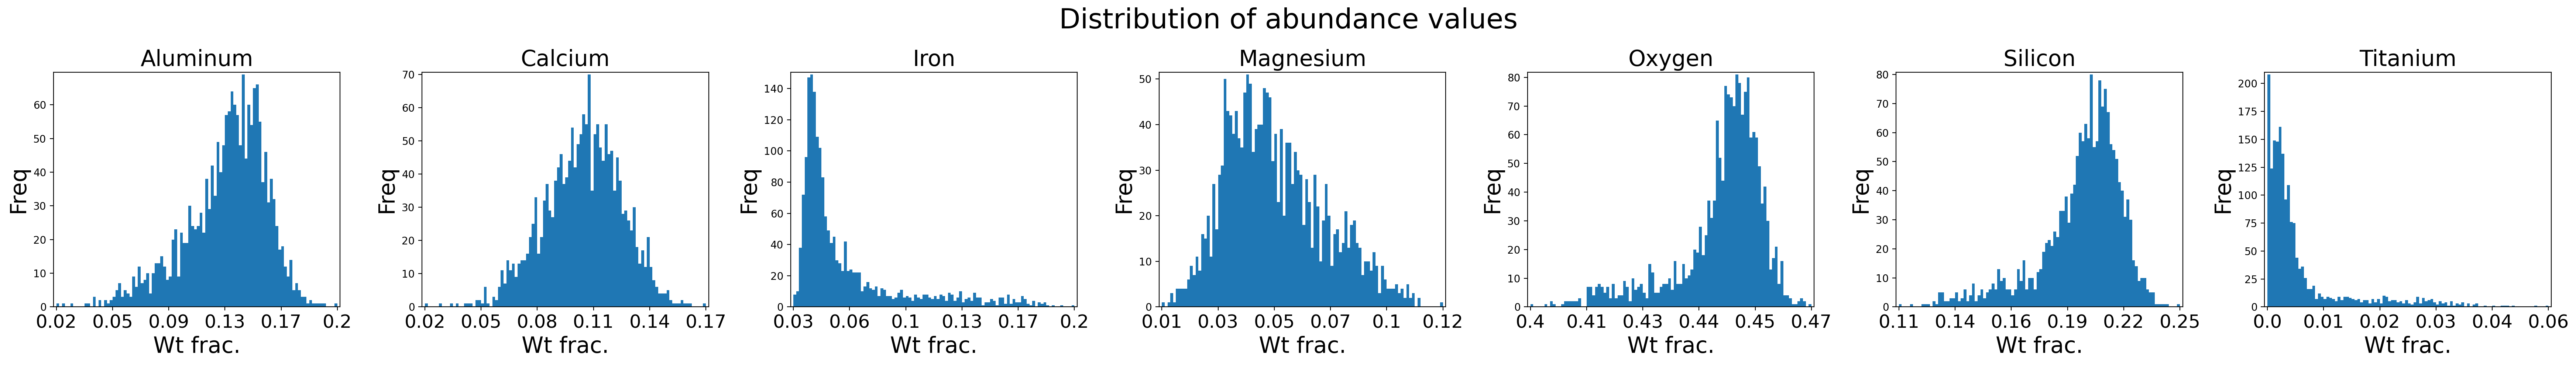

In [21]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=7,
                         figsize=(35,5),
                         dpi=200)
#iterate over all elements
for i in range(regularElementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(regularElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(regularElementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("Wt frac.",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(regularElementalAbundances[:,i]),
                                 np.amax(regularElementalAbundances[:,i])+np.ptp(regularElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(regularElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(regularElementalAbundances[:,i]),
                                                 np.amax(regularElementalAbundances[:,i])+np.ptp(regularElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(regularElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

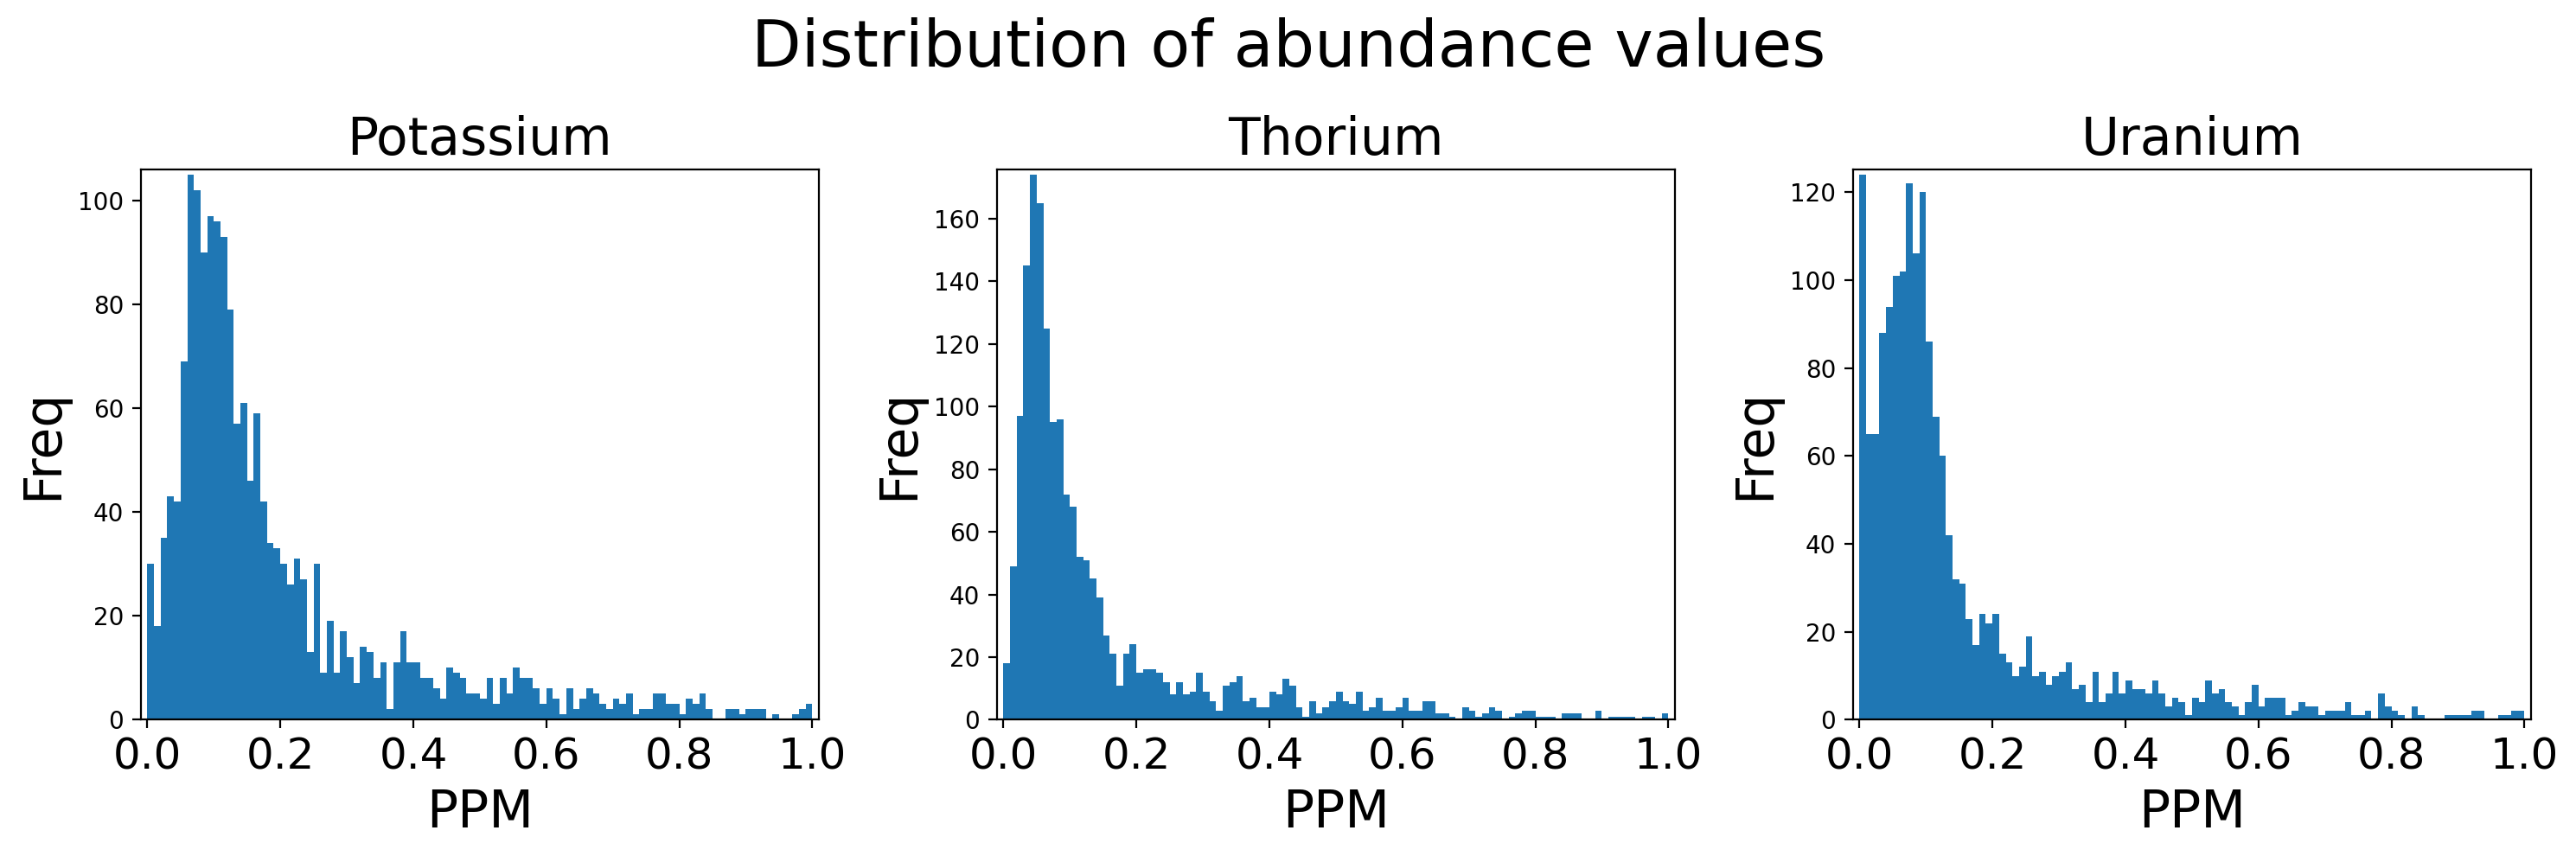

In [22]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=3,
                         figsize=(15,5),
                         dpi=200)
#iterate over all elements
for i in range(nuclearElementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(nuclearElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(nuclearElementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("PPM",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(nuclearElementalAbundances[:,i]),
                                 np.amax(nuclearElementalAbundances[:,i])+np.ptp(nuclearElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(nuclearElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(nuclearElementalAbundances[:,i]),
                                                 np.amax(nuclearElementalAbundances[:,i])+np.ptp(nuclearElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(nuclearElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

In [ ]:
#create a figure
plt.figure(figsize=(30,15),
           dpi=100)
#and plot all the spectra
for i in range(preprocessedSpectra.shape[0]):
    plt.plot(relaventEnergyBands,
             preprocessedSpectra[i,:],
             lw=5)
#annotate the figure
plt.title("Preprocessed GRS Spectra",
          fontsize=baseFontSize*1.8)
plt.xticks(np.arange(np.amin(relaventEnergyBands),
                     np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                     np.ptp(relaventEnergyBands)/noOfXticks),
           fontsize=baseFontSize*1.2)
plt.yticks(np.arange(np.amin(preprocessedSpectra),
                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                     np.ptp(preprocessedSpectra)/noOfXticks),
           labels=np.round(np.arange(np.amin(preprocessedSpectra),
                                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                                     np.ptp(preprocessedSpectra)/noOfXticks),
                           2),
           fontsize=baseFontSize*1.2)
plt.xlabel("KeV",
           fontsize=baseFontSize*1.5)
plt.ylabel("log(Counts/min) ratioed",
           fontsize=baseFontSize*1.5)
plt.margins(0)

In [ ]:
#import PCA from sklearn
from sklearn.decomposition import PCA
#import cosine distance from scipy
from scipy.spatial.distance import cosine as cosineDistance

#define a function which given an array of spectra, explained-variance ratio, and no of spectra to be selected
#returns the indices of most interesting (most unlike the others) spectra
def extractMostExtremeSpectraWithDEMUD(spectra,varianceToExplain,noOfSpectraToRetrive):
    #create an array to hold the indices of the selected (interesting) super-pixels
    selectedSpectraIndices=[]
    #create a PCA object which explains over 95% of the variance in the data
    pcaObject=PCA(n_components=varianceToExplain,
                  svd_solver='auto')
    #compute the PCA model for the spectra and use it to reconstruct the orginal spectra
    reconstructedSpectra=pcaObject.inverse_transform(pcaObject.fit_transform(spectra))
    #create an array to save the reconstruction error (cosine distance)
    reconstructionErrors=np.full(spectra.shape[0],
                                 np.nan)
    #compute the cosine distance between the orginal and reconstructed spectra
    for i in range(spectra.shape[0]):
        reconstructionErrors[i]=cosineDistance(spectra[i,:],
                                               reconstructedSpectra[i,:])
    #save the index of the spectra with the greatest error
    selectedSpectraIndices.append(np.argmax(reconstructionErrors))

    #iteratively extract the most dissimar spectra
    for i in range(noOfSpectraToRetrive-1):
        #fit PCA to the selected spectra
        pcaObject.fit(spectra[selectedSpectraIndices,:])
        #apply PCA and then reconstruct the spectra
        reconstructedSpectra=pcaObject.inverse_transform(pcaObject.transform(spectra))
        #create an array to save the reconstruction error (cosine distance)
        reconstructionErrors=np.full(spectra.shape[0],np.nan)
        #compute the cosine distance between the orginal and reconstructed spectra
        for i in range(spectra.shape[0]):
            reconstructionErrors[i]=cosineDistance(spectra[i,:],
                                                   reconstructedSpectra[i,:])
        #remove the error of the selected pixels
        reconstructionErrors=np.delete(reconstructionErrors,
                                       selectedSpectraIndices)
        #get the index of the spectra with the greatest error
        selectedSpectraIndices.append(np.delete(np.arange(0,spectra.shape[0],1),
                                                selectedSpectraIndices,axis=0)[np.argmax(reconstructionErrors)])
        
    return selectedSpectraIndices

In [ ]:
#set parameters for extracting differing spectra
varianceToBeExplainedDuringDEMUD=0.98
noOfExtremeSpectraToBeRetrieved=179
#get indices of the most extreme spectra
extremeIndices=extractMostExtremeSpectraWithDEMUD(preprocessedSpectra,
                                                  varianceToExplain=varianceToBeExplainedDuringDEMUD,
                                                  noOfSpectraToRetrive=noOfExtremeSpectraToBeRetrieved)

In [ ]:
#get the subset data
#spectra
preprocessedSpectra=preprocessedSpectra[extremeIndices,:]
#regular abundances
regularElementalAbundances=regularElementalAbundances[extremeIndices,:]
#nuclear abundances
nuclearElementalAbundances=nuclearElementalAbundances[extremeIndices,:]

In [ ]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=7,
                         figsize=(35,5),
                         dpi=200)
#iterate over all elements
for i in range(regularElementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(regularElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(regularElementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("Wt frac.",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(regularElementalAbundances[:,i]),
                                 np.amax(regularElementalAbundances[:,i])+np.ptp(regularElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(regularElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(regularElementalAbundances[:,i]),
                                                 np.amax(regularElementalAbundances[:,i])+np.ptp(regularElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(regularElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

In [ ]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=3,
                         figsize=(15,5),
                         dpi=200)
#iterate over all elements
for i in range(nuclearElementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(nuclearElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(nuclearElementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("PPM",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(nuclearElementalAbundances[:,i]),
                                 np.amax(nuclearElementalAbundances[:,i])+np.ptp(nuclearElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(nuclearElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(nuclearElementalAbundances[:,i]),
                                                 np.amax(nuclearElementalAbundances[:,i])+np.ptp(nuclearElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(nuclearElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

In [ ]:
#create a figure
plt.figure(figsize=(30,15),
           dpi=100)
#and plot all the spectra
for i in range(preprocessedSpectra.shape[0]):
    plt.plot(relaventEnergyBands,
             preprocessedSpectra[i,:],
             lw=5)
#annotate the figure
plt.title("Preprocessed GRS Spectra",
          fontsize=baseFontSize*1.8)
plt.xticks(np.arange(np.amin(relaventEnergyBands),
                     np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                     np.ptp(relaventEnergyBands)/noOfXticks),
           fontsize=baseFontSize*1.2)
plt.yticks(np.arange(np.amin(preprocessedSpectra),
                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                     np.ptp(preprocessedSpectra)/noOfXticks),
           labels=np.round(np.arange(np.amin(preprocessedSpectra),
                                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                                     np.ptp(preprocessedSpectra)/noOfXticks),
                           2),
           fontsize=baseFontSize*1.2)
plt.xlabel("KeV",
           fontsize=baseFontSize*1.5)
plt.ylabel("log(Counts/min) ratioed",
           fontsize=baseFontSize*1.5)
plt.margins(0)

In [ ]:
#import tensorflow
import tensorflow as tf

In [ ]:
#set a global seed value
globalSeed=23

In [ ]:
#compute the number of channels in the pre-processed spectra
noOfChannels=preprocessedSpectra.shape[1]

In [ ]:
#create an input layer
inputLayer=tf.keras.Input(shape=(noOfChannels,
                                 1))

In [ ]:
#create a function which given a feature volume, applies a single convolutional block to it
#the convolution block consists of
#Convolutional layer; Activation; Batch Normalization; Dropout
#the number of filters, their sizes, strideactivation function, and dropout rate are specified
def createConvolutionalBlock(inputVolume,noOfFilters,kernelSize,strideSize,dropoutRate):
    #create a convolutional block
    convolutionalLayer=tf.keras.layers.Conv1D(filters=noOfFilters,
                                                   kernel_size=kernelSize,
                                                   strides=strideSize,
                                                   padding='valid')
    #add the 1st Conv layer to the graph
    volume=convolutionalLayer(inputVolume)

    #apply Relu activation
    preluActivation=tf.keras.layers.PReLU()
    #add the 1st activation layer to the graph
    volume=preluActivation(volume)

    #apply batch normalization
    batchNormalization=tf.keras.layers.BatchNormalization()
    #add the 1st batch-norm layer to the graph
    volume=batchNormalization(volume)

    #apply dropout
    dropoutLayer=tf.keras.layers.Dropout(dropoutRate,
                                         noise_shape=None,
                                         seed=globalSeed)
    #add the 1st dropout layer to the graph
    volume=dropoutLayer(volume)
    
    return volume

In [ ]:
#create a list containing the number of features to be outputted by each Conv block
noOfChannelsInEachConvBlock=[128,256,512,1024]
#create a list containing the sizes filter for each Conv block
filterSizesForEachConvBlock=[7,5,3,3]
#create a list containing the strides for each Conv block
strideSizesForEachConvBlock=[3,3,2,2]
#create a list containing the dropout rate for each Conv block
dropoutForEachConvBlock=[0.5,0.5,0.5,0.5]

In [ ]:
#create a NN (Neural Network) graph containing just the input layer
regularElementFeatures=inputLayer
nuclearElementFeatures=inputLayer

In [ ]:
#add Convolutional blocks to create the feature extractor for regular elements

for i in range(len(noOfChannelsInEachConvBlock)):
    #create a convolutional block
    regularElementFeatures=createConvolutionalBlock(regularElementFeatures,
                                                    noOfChannelsInEachConvBlock[i],
                                                    filterSizesForEachConvBlock[i],
                                                    strideSizesForEachConvBlock[i],
                                                    dropoutForEachConvBlock[i])
    
    print(f"Shape of the tensor outputted by the 0th Conv. Block {regularElementFeatures.shape}")


In [ ]:
#Flatten the features for the regular elemnents
regularElementFeatures=tf.keras.layers.Flatten()(regularElementFeatures)
print(f"Shape of flattened features {regularElementFeatures.shape}")

In [ ]:
#create a list containing the number of features to be outputted by each Conv block
noOfChannelsInEachConvBlock=[128,256,512]
#create a list containing the sizes filter for each Conv block
filterSizesForEachConvBlock=[7,5,3]
#create a list containing the strides for each Conv block
strideSizesForEachConvBlock=[3,3,2]
#create a list containing the dropout rate for each Conv block
dropoutForEachConvBlock=[0.5,0.5,0.5]

In [ ]:
#add Convolutional blocks to create the feature extractor for regular elements

for i in range(len(noOfChannelsInEachConvBlock)):
    #create a convolutional block
    nuclearElementFeatures=createConvolutionalBlock(nuclearElementFeatures,
                                                    noOfChannelsInEachConvBlock[i],
                                                    filterSizesForEachConvBlock[i],
                                                    strideSizesForEachConvBlock[i],
                                                    dropoutForEachConvBlock[i])
    
    print(f"Shape of the tensor outputted by the 0th Conv. Block {nuclearElementFeatures.shape}")


In [ ]:
#Flatten the features for the nuclear elements
nuclearElementFeatures=tf.keras.layers.Flatten()(nuclearElementFeatures)
print(f"Shape of flattened features {nuclearElementFeatures.shape}")

In [ ]:
#get the regular elements' abundances from the generated features
#it consists of three steps
#1. Apply a dense layer with 7 nodes without any activation
#2. Compute the absolute value of the values computed by dense layer
#3. Compute the l1-norm of the 7 regular elements and and divide them by it


In [ ]:
#define a function which given the output of a layer, ensures the sum of the values is one
#it does this by computing the sum of the nodes and dividing each note by it
def estimateAbundances(inputNodes,name):
    sampleWiseSums=tf.keras.backend.sum(inputNodes,
                                        axis=-1,
                                        keepdims=True)
    sampleWiseSums=tf.repeat(sampleWiseSums,
                             sampleWiseSums.shape[-1],
                             axis=-1)
    return tf.math.divide(inputNodes,
                          sampleWiseSums+1e-10,
                          name=name)

In [ ]:
#add a fully connected layer to the network (output layer)
regularElementStage1=tf.keras.layers.Dense(7,activation='relu')(regularElementFeatures)

#add a normalization layer to the network
regularAbundanceEmbedding=tf.nn.softmax(regularElementStage1,
                                        name="Regular_Abundances")


#print shape of abundances
print(f"Unscaled regular element shape {regularAbundanceEmbedding.shape}")


In [ ]:
#get the abundances for the nuclear elements from their features
nuclearAbundanceEmbedding=tf.keras.layers.Dense(3,activation='relu',name="Nuclear_Abundances")(nuclearElementFeatures)
#print shape of abundances
print(f"Unscaled regular element shape {nuclearAbundanceEmbedding.shape}")

In [ ]:
#concattenate the two abundances
fullAbundanceEmbedding=tf.concat([regularAbundanceEmbedding,nuclearAbundanceEmbedding],
                                 axis=-1)

print(f"All element shape {fullAbundanceEmbedding.shape}")

In [ ]:
#get the weights of the ten linear layers as a matrix (tensor) of shape no of channels x no of spectra
linearLayerWeights=[]
for i in range(len(elementWiseHiddenLayers)):
    linearLayerWeights.append(elementWiseHiddenLayers[i].get_weights()[0][0])
linearLayerWeights=tf.stack(linearLayerWeights,
                            axis=0,
                            name='linerLayerWeights')


#multiply the weights by their transpose to get the dot products (provided the weight vectors have an l2-norm of 1)
#sum the dot products up to get a value proportional to the sum of pairwise dot products
unmixingSpectralSimilarity=tf.math.reduce_sum(tf.linalg.matmul(linearLayerWeights,
                                                               linearLayerWeights,
                                                               transpose_b=True)
                                             )

#compute pairwise cosine similarities by taking the dot product of the weight matrix with its transpose




In [ ]:
#define regularization for the element-wise spectra
#the regularizer encourages the elemental spectra to be different
#this is done by computing the pairwise cosine distances, summing them up and maximizing this sum

#as these weights are from seperate (parallel)layers this regularization could not be implemented as inheriting the kernel regularization class
#therefore it is implemented as a loss. As such it recieves the true and predicted values but ignores them
class spectralDisimilarityRegularization(Loss):
    def call(self,y_true,y_pred):
        #access the element wise hidden layers
        global elementWiseHiddenLayers
        #get the weights of the ten linear layers as a matrix (tensor) of shape no of channels x no of spectra
        linearLayerWeights=[]
        for i in range(len(elementWiseHiddenLayers)):
            linearLayerWeights.append(elementWiseHiddenLayers[i].get_weights()[0][0])
        linearLayerWeights=tf.stack(linearLayerWeights,
                                    axis=0,
                                    name='linerLayerWeights')


        #multiply the weights by their transpose to get the dot products (provided the weight vectors have an l2-norm of 1)
        #sum the dot products up to get a value proportional to the sum of pairwise dot products
        unmixingSpectralSimilarity=tf.math.reduce_sum(tf.linalg.matmul(linearLayerWeights,
                                                                       linearLayerWeights,
                                                                       transpose_b=True)
                                                     )

        #compute pairwise cosine similarities by taking the dot product of the weight matrix with its transpose
    

In [ ]:
#create a composite constraint to be applied to the weights of the hidden layers which are the weights
class UnitNormNonNegetivityConstraint(tf.keras.constraints.Constraint):
    def __init__(self,axis=0):
        self.axis=axis
    def __call__(self, w):
        #apply positivity constraint
        w=w*tf.cast(tf.greater_equal(w,0.0),
                    tf.keras.backend.floatx())
    
        #apply l2-Norm equal to 1 one constraint
        w=w/(tf.keras.backend.epsilon()+tf.keras.backend.sqrt(tf.reduce_sum(tf.square(w),
                                                                            axis=self.axis,
                                                                            keepdims=True)
                                                             )
            )
        return w



#create the composite constraint by combining the two constraints
unitNormNonNegetivityConstraint=UnitNormNonNegetivityConstraint()

In [ ]:
#create the linear hidden layer as a combination of ten hidden layers each connected to a single abundance value
elementWiseHiddenLayers=[]
elementWiseHiddenLayerOutputs=[]
for i in range(fullAbundanceEmbedding.shape[-1]):
    temp=tf.keras.layers.Dense(noOfChannels,activation=None,use_bias=False,kernel_constraint=unitNormNonNegetivityConstraint,name=allElementNames[i]+"_Spectra")
    elementWiseHiddenLayers.append(temp)
    temp=temp(tf.expand_dims(fullAbundanceEmbedding[:,i],-1))
    elementWiseHiddenLayerOutputs.append(tf.expand_dims(temp,-1))
    del temp
    print(f"Shape of the spectra outputed by {allElementNames[i]} {elementWiseHiddenLayerOutputs[-1].shape}")

In [ ]:
#add the element wise spectra
linearMixedSpectra=tf.keras.backend.sum(tf.keras.layers.Concatenate(axis=-1)(elementWiseHiddenLayerOutputs),
                                        axis=-1,
                                        keepdims=False)
print(f"Shape of the linearly mixed spectra {linearMixedSpectra.shape}")

In [ ]:
#build the model
unmixingModel=tf.keras.Model(inputs=inputLayer,
                             outputs=[regularAbundanceEmbedding,
                                      nuclearAbundanceEmbedding,
                                      linearMixedSpectra],
                             name="Constrained_Dual_Encoder_Unmxing_Model")

In [ ]:
#create the loss function for the embedding, Mean Squared Error
abundanceLossFunction=tf.keras.losses.MeanSquaredError()
#create the loss function for the reconstructed spectra, Cosine loss
recontructedSpectraLoss=tf.keras.losses.CosineSimilarity()
#create the optimizer
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
#set the number of epochs the model is to be trained for
noOfEpochs=300
#set the batch size
batchSize=179

#set no. of folds over which the model is to be validated
noOfFolds=5

In [ ]:
#compile the model
unmixingModel.compile(optimizer=optimizer,
                      loss=[abundanceLossFunction,abundanceLossFunction,recontructedSpectraLoss,spectralDisimilarityRegularization],
                      loss_weights=[1e-2,1,1e-5,1e-1])

In [ ]:
#set the address where the untrained model will be saved
#untrainedModelWeightsAddress="C:/ML4Sci/Ml4Sci_GRS_abundance_estimation/Models/untrained_Regularized_Constrainted_Dual_Unmixing_Model_With_PReLU_Weights.h5"
untrainedModelWeightsAddress="D:/Non-academic/GSOC23/untrained_Regularized_Constrainted_Dual_Unmixing_Model_With_PReLU_Weights_and_Linear_Decoder.h5"

In [ ]:
#save the untrained model
unmixingModel.save_weights(untrainedModelWeightsAddress,
                           overwrite=True)

In [ ]:
#check if the GPU is available
if len(tf.config.list_physical_devices('GPU'))==1:
    print("GPU available")
else:
    print("GPU unavailable")

In [ ]:
noOfXticks=3
noOfYticks=5

In [ ]:
#create an array to save the element-wise learnt spectra across folds
learntElementalSpectra=np.zeros((noOfChannels,
                                 fullAbundanceEmbedding.shape[-1]))

In [ ]:
unmixingModel.load_weights(untrainedModelWeightsAddress)
 #compile the model
unmixingModel.compile(optimizer=optimizer,
                      loss=[abundanceLossFunction,
                            abundanceLossFunction,
                            recontructedSpectraLoss],
                      loss_weights=[1e-2,1,1e-5])

#fit the model to the current fold's data
currentModelTrainingHistory=unmixingModel.fit(x=preprocessedSpectra,
                                                        y=[regularElementalAbundances,
                                                           nuclearElementalAbundances,
                                                           preprocessedSpectra],
                                                        batch_size=batchSize,
                                                        epochs=noOfEpochs)


#save the training history of the current model
modelTrainingHistories.append(currentModelTrainingHistory)



#set the address where the untrained model will be saved
trainedModelWeightsAddress="D:/Non-academic/GSOC23/trained_Regularized_Constrainted_Dual_Unmixing_Model_With_PReLU_Weights_and_Linear_Decoder.h5"

#save the untrained model
unmixingModel.save_weights(trainedModelWeightsAddress,
                           overwrite=True)

In [ ]:

#iterate through all the elements
for i in range(len(allElementNames)):

    #get the mean spectrum for the current element
    currentElementSpectrum=unmixingModel.get_layer(allElementNames[i]+"_Spectra").get_weights()[0][0]

    #save the spectrum
    learntElementalSpectra[:,i]=currentElementSpectrum